In [29]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [30]:
import numpy as np
import pandas as pd

In [31]:
import datetime as dt

In [1]:
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [32]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [33]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [34]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [35]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [71]:
#Query for latest date
  
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date
#output: ('2017-08-23')

# Design a query to retrieve the last 12 months of precipitation data and plot the results

oneyearbefore = dt.datetime(2016,8,23)
#Variable oneyearbefore created in lieu of dt.timedelta(days=365) function

precip_results = session.query(Measurement).\
            filter(Measurement.date > oneyearbefore).all()

#list comprehension of date and level
precip_date = [p.date for p in precip_results]
precip_level = [p.prcp for p in precip_results]



In [73]:
#dataframe
d = {'date':precip_date,'level':precip_level}

df = pd.DataFrame(data = d)
df.set_index('date')

,level
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


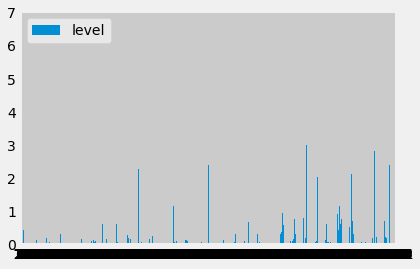

In [79]:
df.plot.bar(rot=0)

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [88]:
df['level'].count()

2015

In [89]:
# Use Pandas to calcualte the summary statistics for the precipitation data
count = df['level'].count()
mean = df['level'].mean()
std = df['level'].std()
min_ = df['level'].min()
twenty_five = df['level'].quantile(.25)
fifty = df['level'].quantile(.50)
seventy_five = df['level'].quantile(.75)
max_ = df['level'].max()

summary_df = pd.DataFrame({'precipitation': [count,mean,std,min_,twenty_five,fifty,seventy_five,max_]},
                          index = ['count','mean','std','min','25%','50%','75%','max'])
summary_df

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [104]:
# Design a query to show how many stations are available in this dataset?
from sqlalchemy import distinct
distinct_station = session.query(Measurement.station).distinct().count()
[distinct_station]

[9]

In [139]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

unique_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
unique_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [149]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [159]:
# Choose the station with the highest number of temperature observations.
latest_date = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
latest_date

oneyearbefore = dt.datetime(2016,8,18)

temp_results = session.query(Measurement.station,Measurement.tobs,Measurement.date).filter(Measurement.date > oneyearbefore).filter(Measurement.station == 'USC00519281').all()
temp_results

[('USC00519281', 79.0, '2016-08-19'),
 ('USC00519281', 81.0, '2016-08-20'),
 ('USC00519281', 79.0, '2016-08-21'),
 ('USC00519281', 78.0, '2016-08-22'),
 ('USC00519281', 77.0, '2016-08-23'),
 ('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC005192

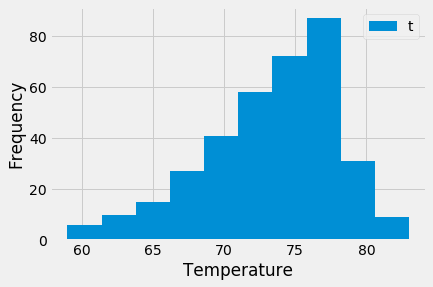

In [161]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = [t[1] for t in temp_results]
plt.hist(temperature)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.legend('tobs')
plt.show()

In [164]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

#My trip dates I chose are for the period 04 - 04 - 2017 to 04 - 09 - 2017. 
print(calc_temps('2016-04-04','2016-04-09'))

[(65.0, 72.4, 78.0)]


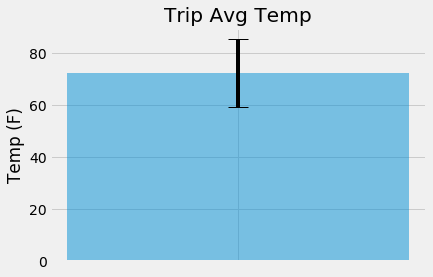

In [188]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = 78-65
x_pos =''
y_pos = 72.4
fig, ax = plt.subplots()
ax.bar(x_pos,y_pos,yerr = error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temp (F)')
ax.set_xlabel('')
plt.title('Trip Avg Temp')

plt.show()

In [205]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation


session.query(Measurement.station, Station.name, Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).\
filter(Measurement.date >= '2016-04-04').filter(Measurement.date <= '2016-04-09').filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()



[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.31),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.0100000000000002),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.1),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.32),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.04),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.01),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.0)]

## Optional Challenge Assignment

In [206]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [225]:
#create a list of my travel dates
list = []
x = 4
while x < 10:
    list.append(f'04-0{x}')
    x += 1
list


['04-04', '04-05', '04-06', '04-07', '04-08', '04-09']

In [226]:
#list comprehension
normals = [daily_normals(i)[0] for i in list]
normals

[(58.0, 72.01639344262296, 78.0),
 (61.0, 72.28813559322033, 80.0),
 (67.0, 71.57142857142857, 77.0),
 (63.0, 71.10526315789474, 78.0),
 (66.0, 72.10526315789474, 77.0),
 (62.0, 71.6140350877193, 78.0)]

In [238]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

tripdates = [('2017-' + i)for i in list]
tmin = [n[0] for n in normals]
tavg = [n[1] for n in normals]
tmax = [n[2] for n in normals]

df_normals = pd.DataFrame({'tmin':tmin,'tavg':tavg,'tmax':tmax},index=tripdates)
df_normals.index.name = 'date'
df_normals

,tmin,tavg,tmax
date,,,
2017-04-04,58.0,72.016393,78.0
2017-04-05,61.0,72.288136,80.0
2017-04-06,67.0,71.571429,77.0
2017-04-07,63.0,71.105263,78.0
2017-04-08,66.0,72.105263,77.0
2017-04-09,62.0,71.614035,78.0


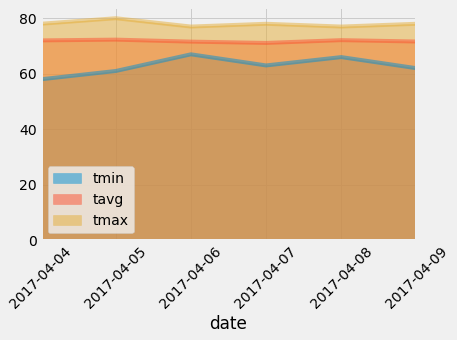

In [242]:
# Plot the daily normals as an area plot with `stacked=False`
df_normals.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.show()

In [2]:
#################################################
# Flask Setup
#################################################
app = Flask(__name__)